<a href="https://colab.research.google.com/github/fernanda-palacios/ai-code-notebooks/blob/main/b_gradient_descent_linear_regression_vectorized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent in Linear Regression - Vectorized**



In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def generate_regression_dataset(start_xval, end_xval, num_points, noise_factor):
    slope, intercept = torch.randn(2)
    xvals = torch.arange(start=start_xval, end=end_xval, step=(end_xval - start_xval)/num_points)
    yvals = xvals * slope + intercept + (torch.randn_like(xvals) * noise_factor)
    return xvals, yvals


def plot_regression_dataset(xvals, yvals, weight=None, bias=None, size=None) -> None:
    if size is None:
        size = [20 for _ in xvals]
    else:
        size = [size for _ in xvals]

    plt.figure(figsize=(20, 10))
    plt.scatter(xvals, yvals, s=size)

    if weight is not None and bias is not None:
        min_yval = weight * xvals[0] + bias
        max_yval = weight * xvals[-1] + bias
        plt.plot([xvals[0], xvals[-1]], [min_yval, max_yval], c="red")

    plt.show()

In [3]:
def f(x, w, b):
    return x * w + b

def calc_mse_loss(yhat, y):
    return ((yhat - y) ** 2).mean()

def calc_w_grad(yhat, y, x):
    return 2 * ((yhat - y) * x).mean()

def calc_b_grad(yhat, y):
    return 2 * (yhat - y).mean()

In [4]:
torch.manual_seed(0)
x, y = generate_regression_dataset(0, 1000, 1000, 100)

w, b = 0, 0
lr = 0.00000001
for i in range(1000):
    yhat = f(x, w, b)
    mse = calc_mse_loss(yhat, y)
    w_grad = calc_w_grad(yhat, y, x)
    b_grad = calc_b_grad(yhat, y)
    w = w - lr * w_grad
    b = b - lr * b_grad

Mean Squared Error Loss:  tensor(10429.2109)


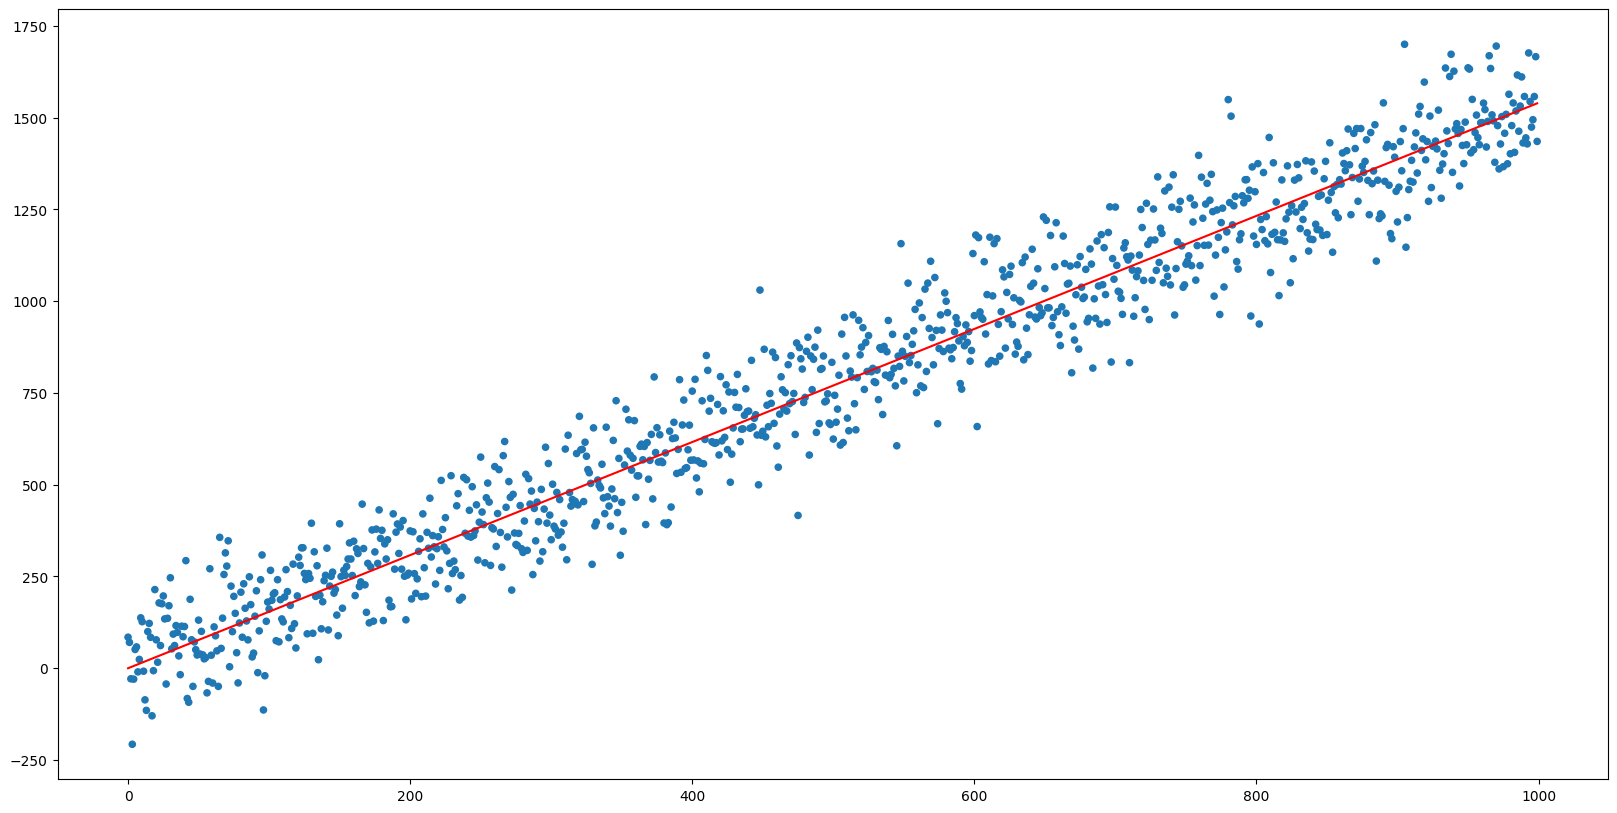

In [5]:
print("Mean Squared Error Loss: ",mse)
plot_regression_dataset(x, y, w, b)